In [5]:
import numpy as np
import torch as tr
import torch.nn as nn
from torch import distributions
from torch.nn.parameter import Parameter
import phi4_mg as m
import phi4 as p
import integrators as i
import update as u

import matplotlib.pyplot as plt
import O3 as s

import time
import matplotlib.pyplot as plt
from tqdm import tqdm

import argparse
import sys
    
import time
from stacked_model import *

import matplotlib.pyplot as plt
import matplotlib as mpl

import os
os.environ["PATH"] = "/sciclone/home/yacahuanamedra/texlive/bin/x86_64-linux:" + os.environ["PATH"]

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amsfonts}')
import pickle


from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

tensor([-0.0004])


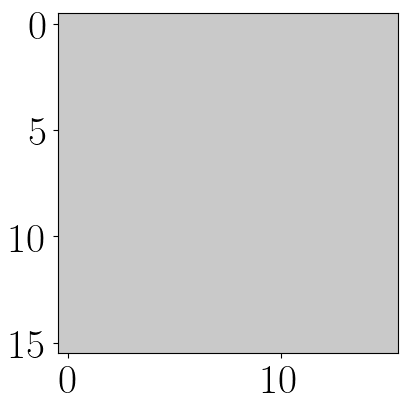

 HMC:  0  DH=  [0.100128173828125]  A/R=  [True]  Pacc=  1.0
 HMC:  1  DH=  [0.08416748046875]  A/R=  [True]  Pacc=  1.0
 HMC:  2  DH=  [0.00787353515625]  A/R=  [True]  Pacc=  1.0
 HMC:  3  DH=  [0.0426025390625]  A/R=  [True]  Pacc=  1.0
 HMC:  4  DH=  [0.00946044921875]  A/R=  [True]  Pacc=  1.0
 HMC:  5  DH=  [0.026611328125]  A/R=  [True]  Pacc=  1.0
 HMC:  6  DH=  [0.052490234375]  A/R=  [True]  Pacc=  1.0
 HMC:  7  DH=  [-0.03173828125]  A/R=  [True]  Pacc=  1.0
 HMC:  8  DH=  [0.067626953125]  A/R=  [True]  Pacc=  1.0
 HMC:  9  DH=  [-0.0125732421875]  A/R=  [True]  Pacc=  1.0
 HMC:  10  DH=  [-0.015869140625]  A/R=  [True]  Pacc=  1.0
 HMC:  11  DH=  [-0.00225830078125]  A/R=  [True]  Pacc=  1.0
 HMC:  12  DH=  [0.0042724609375]  A/R=  [True]  Pacc=  1.0
 HMC:  13  DH=  [0.02783203125]  A/R=  [True]  Pacc=  1.0
 HMC:  14  DH=  [-0.02679443359375]  A/R=  [True]  Pacc=  1.0
 HMC:  15  DH=  [0.00274658203125]  A/R=  [True]  Pacc=  1.0
 HMC:  16  DH=  [-0.001953125]  A/R=  [True] 

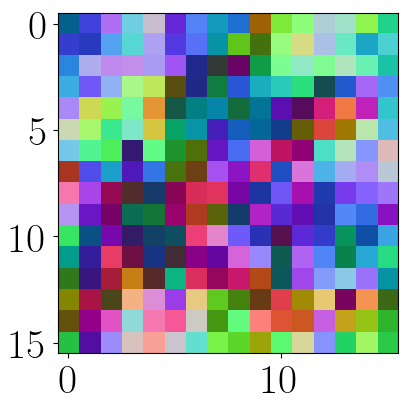

In [2]:
Nwarm =100
L=16
lat=[L,L]
V=L*L
batch_size=1
beta = 1.263
o  = s.O3(lat,beta,batch_size=batch_size)
sigma = o.coldStart()
sig2img = (sigma[0].permute((1,2,0))+1.0)/2.0
print(o.action(sigma))
plt.imshow(sig2img, interpolation='nearest')
plt.show()
mn2 = i.minnorm2(o.force,o.evolveQ,7,1.0)
hmc = u.hmc(T=o,I=mn2)
sigma = hmc.evolve(sigma,Nwarm)
sig2img = (sigma[0].permute((1,2,0))+1.0)/2.0
print(sigma[0].shape,sig2img.shape)
plt.imshow(sig2img, interpolation='nearest')
plt.show()

In [ ]:
o.action(sigma)

tensor([[[[ 1.9338e+00,  6.1514e-01, -8.5999e-01, -4.7521e-01, -1.0486e+00,
            1.2117e+00, -8.4468e-01,  2.1583e-01,  1.1837e+00, -1.1609e+00,
            3.7415e-01, -1.2328e+00, -1.2804e-01, -1.4151e+00, -1.1948e-01,
            3.4081e-01],
          [ 1.0794e-01, -2.0121e-01, -1.8716e+00,  1.9174e+00, -8.2990e-02,
           -1.5492e-01,  7.9054e-01,  2.1371e-01,  3.0499e-01, -3.7525e-01,
           -5.9612e-01, -2.5971e-01,  9.5135e-01,  3.6483e-01, -2.5184e-01,
            7.4459e-02],
          [-2.5168e-01,  9.1132e-01, -1.2953e+00,  6.0136e-01, -9.2251e-01,
            7.5225e-02, -3.1767e-01,  1.6799e-01,  5.0663e-01, -5.9743e-01,
           -3.2332e-01,  3.5064e-01, -5.8617e-01,  6.8155e-01, -1.4952e-01,
            7.5370e-01],
          [-2.1430e-01,  9.5672e-02,  4.3668e-01,  1.4925e-01, -5.4538e-01,
           -1.1347e+00,  8.2907e-01, -6.8927e-01, -8.8712e-01, -1.8630e-01,
            5.8622e-01, -8.3740e-01, -1.6918e+00, -3.1112e-01,  2.0476e-01,
           -1

In [39]:
testtt=tr.tensor([[12.6153]])
testtt.shape
#reshape 
testtt.squeeze(1)

tensor([12.6153])

In [23]:
sigma = sigma.clone().detach().requires_grad_(True)
S = o.action(sigma)  # Esto te da un vector de tamaño (batch,)
print(S.shape)
S_total = S.sum()     # Sumar sobre el batch para hacer backward

S_total.backward()

# Ahora el gradiente está en sigma.grad
autograd_force = sigma.grad  # Esto corresponde a +∇S

force = o.force(sigma.detach())  # Asegúrate de que no tenga gradientes acumulados
autograd_force = sigma.grad

# OJO: tu fuerza es -∇S proyectada. Entonces deberías comparar:
diff = (autograd_force - force).norm()
print("Diferencia entre fuerza analítica y autograd:", diff.item())
#shapes


torch.Size([1])
Diferencia entre fuerza analítica y autograd: 65.60638427734375


In [21]:
autograd_force[0,:,8,8].norm()

tensor(3.3877)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7347527..2.6738648].


torch.Size([1, 3, 16, 16]) torch.Size([1, 3, 16, 16]) 1.263 torch.Size([1, 3, 16, 16])
torch.Size([3, 16, 16]) torch.Size([16, 16, 3])


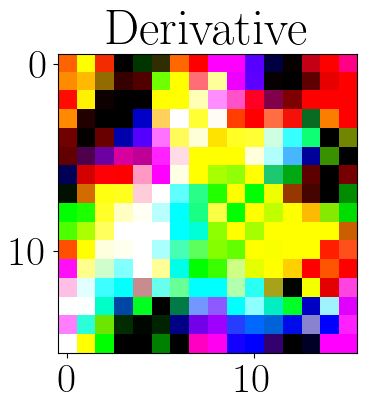

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4209863..2.5143259].


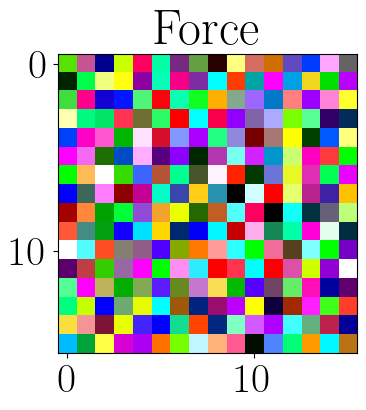

tensor(3.5150)

In [13]:
#o.force(sigma)
force = o.force(sigma)
deriative = tr.autograd.functional.jacobian(o.action, sigma).squeeze(1)
print(deriative.shape,force.shape,o.beta,sigma.shape)
#plot deriative
deriative_force = -deriative
#compare the two forces
sig2img = (deriative[0].permute((1,2,0))+1.0)/2.0
print(sigma[0].shape,sig2img.shape)
plt.imshow(sig2img, interpolation='nearest')
plt.title('Derivative')
plt.show()
sigma2img = (force[0].permute((1,2,0))+1.0)/2.0
plt.imshow(sigma2img, interpolation='nearest')
plt.title('Force')
plt.show()
#meassure the difference
(deriative-force)[0,0,0,0]

### Experiments with couplings O3
Roll in torch

In [6]:
test=tr.zeros(5,5,)
test[0,0]=1.0
test[-1,-1]=2.0
test[0,-1]=3.0
test[-1,0]=4.0
test[2,2]=5.0
rho_test = {
    (0,1): 0.5,
    (1,1): 1,
}
print(test)
for sign in [-1, 1]:
    for (dx, dy), rho in rho_test.items():
        print((sign*dx, sign*dy), rho)
        dx = sign*dx
        dy = sign*dy
        print(tr.roll(test,shifts=(dx, dy),dims=(0,1)),"move (1) in dim ",(dx, dy))
    for (dy, dx), rho in rho_test.items():
        print((sign*dx, sign*dy), rho)
        dx = sign*dx
        dy = sign*dy
        print(tr.roll(test,shifts=(dx, dy),dims=(0,1)),"move (2) in dim ",(dx, dy))
#print(tr.roll(test,shifts=(-1,0),dims=mu),"move (-1,0)")
#print(tr.roll(test,shifts=(1,1),dims=(0,1)),"move (1,1)")
#print(tr.roll(test,shifts=(-1,1),dims=(0,1)),"move (-1,1)")
#print(tr.roll(test,shifts=(2,0),dims=(0,1)),"move (2,0)")


tensor([[1., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0.],
        [0., 0., 0., 0., 0.],
        [4., 0., 0., 0., 2.]])
(0, -1) 0.5
tensor([[0., 0., 0., 3., 1.],
        [0., 0., 0., 0., 0.],
        [0., 5., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 4.]]) move (1) in dim  (0, -1)
(-1, -1) 1
tensor([[0., 0., 0., 0., 0.],
        [0., 5., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 4.],
        [0., 0., 0., 3., 1.]]) move (1) in dim  (-1, -1)
(-1, 0) 0.5
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0.],
        [0., 0., 0., 0., 0.],
        [4., 0., 0., 0., 2.],
        [1., 0., 0., 0., 3.]]) move (2) in dim  (-1, 0)
(-1, -1) 1
tensor([[0., 0., 0., 0., 0.],
        [0., 5., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 4.],
        [0., 0., 0., 3., 1.]]) move (2) in dim  (-1, -1)
(0, 1) 0.5
tensor([[3., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 5., 0

In [14]:
def symmetry_line(vec):
    x, y = vec
    # rotations and reflections
    candidates = [
        (x, y), (-y, x), (-x, -y), (y, -x),
        (-x, y), (x, -y), (y, x), (-y, -x)
    ]
    return set(candidates)
def symmetry_triangle(vec):
    x, y, z, a, b, c = vec
    # rotations and reflections
    candidates = [
        (x, y, z, a, b, c), (y, -x, a, -z, c, -b), (-x, -y, -z, -a, -b, -c), (-y, x, -a, z, -c, b),
        (-x, y, -z, a, -b, c), (-y, -x, -a, -z, -c, -b), (x, -y, z, -a, b, -c), (y, x, a, z, c, b)
    ]
    return set(candidates)
# vectores base
base_line = [(1, 0), (1, 1), (2, 0), (2, 1)]
base_two_line = [(1, 0, 0, 1), (1, 1, 0, 0), (2, 0, 0, 0), (2, 1, 0, 0)]
base_square = [(1, 0, 0, 0, 0, 0), (1, 1, 0, 0, 0, 0), (1, 0, 0, 1, -1, 0)]
symmetry_triangle((1, 1, 0, 0,1,1))

{(-1, -1, 0, 0, -1, -1),
 (-1, 1, 0, 0, -1, 1),
 (1, -1, 0, 0, 1, -1),
 (1, 1, 0, 0, 1, 1)}

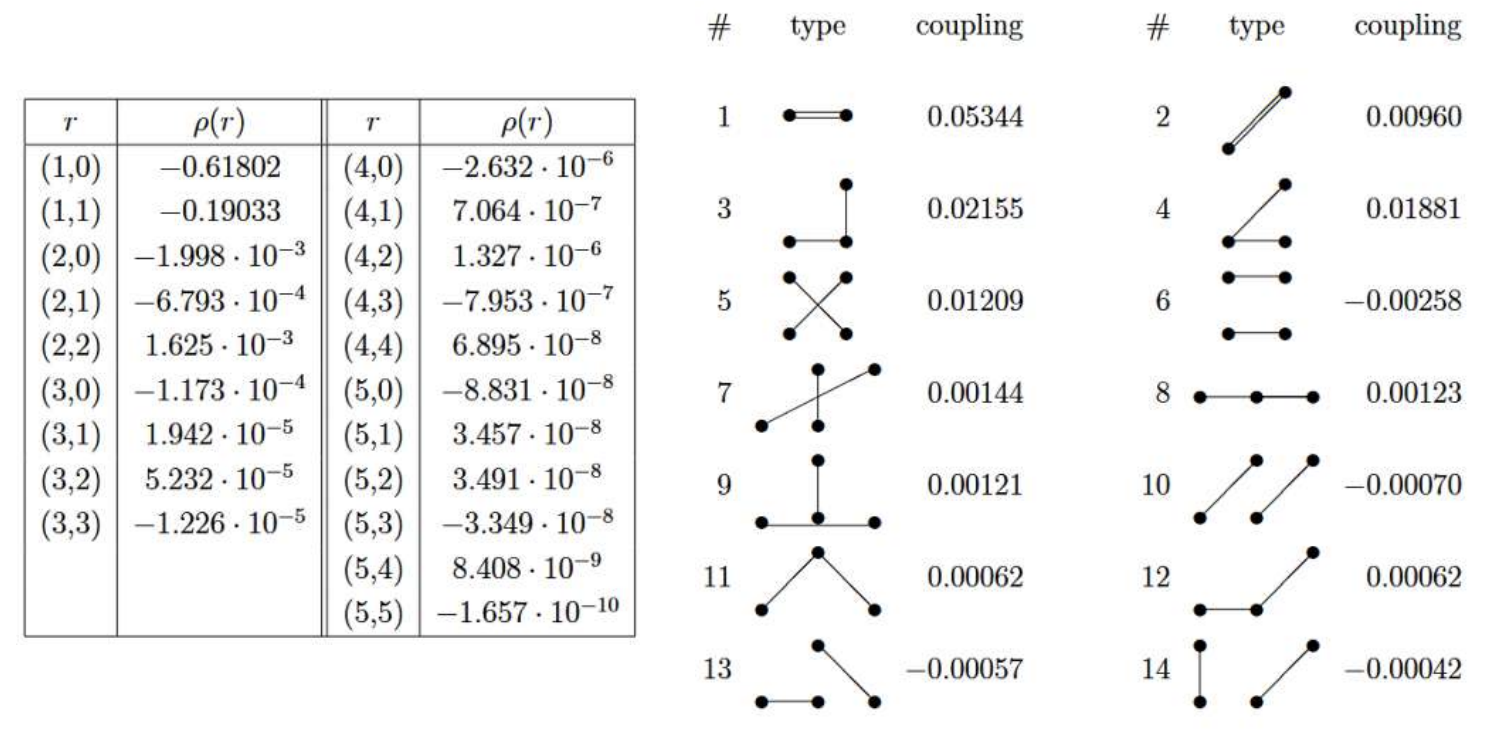

In [25]:
rho_table = {
    (1, 0): -0.61802,
    (1, 1): -1.9033e-1,
    (2, 0): -1.998e-3,
    (2, 1): -6.793e-4,
    (2, 2): 1.625e-3,
    (3, 0): -1.173e-4,
    (3, 1): 1.942e-5,
    (3, 2): 5.232e-5,
    (3, 3): -1.226e-5,
    (4, 0): -2.632e-6,
    (4, 1): 7.064e-7,
    (4, 2): 1.327e-6,
    (4, 3): -7.953e-7,
    (4, 4): 6.895e-8,
    (5, 0): -8.831e-8,
    (5, 1): 3.457e-8,
    (5, 2): 3.491e-8,
    (5, 3): -3.349e-8,
    (5, 4): 8.408e-9,
    (5, 5): -1.657e-10,
}
#no need to specify the first coordinate, it is always 0,0
c_table = {
    (1, 0, 1, 0, -1, 0): 0.05344,
    (1, 1, 1, 1, 0, 0): 0.00960,
    (1, 0, 1, 0, 0, 1): 0.02155,
    (1, 0, 0, 0, 1, 1): 0.01881,
    (1, 1, 0, 1, 1, 0): 0.01209,
    (1, 0, 0, 1, 1, 1): -0.00258,
    (2, 1, 1, 0, 1, 1): 0.00144,
    (1, 0, 1, 0, 2, 0): 0.00123,
    (2, 0, 1, 0, 1, 1): 0.00121,
    (1, 1, 1, 0, 2, 1): -0.00070,
    (1, 1, 1, 1, 2, 0): 0.00062,
    (1, 0, 1, 0, 2, 1): 0.00062,
    (1, 0, 1, 1, 2, 0): -0.00057,
    (0, 1, 1, 0, 1, 1): -0.00042,
}
"""for key in rho_table.keys():
    for comb_key in symmetry_line(key):
        print(comb_key, rho_table[key])"""
for key in c_table.keys():
    for comb_key in symmetry_triangle(key):
        print(comb_key, c_table[key])

(0, -1, 0, -1, 0, 1) 0.05344
(1, 0, 1, 0, -1, 0) 0.05344
(-1, 0, -1, 0, 1, 0) 0.05344
(0, 1, 0, 1, 0, -1) 0.05344
(-1, -1, -1, -1, 0, 0) 0.0096
(1, 1, 1, 1, 0, 0) 0.0096
(1, -1, 1, -1, 0, 0) 0.0096
(-1, 1, -1, 1, 0, 0) 0.0096
(-1, 0, -1, 0, 0, 1) 0.02155
(0, 1, 0, 1, 1, 0) 0.02155
(0, 1, 0, 1, -1, 0) 0.02155
(1, 0, 1, 0, 0, -1) 0.02155
(1, 0, 1, 0, 0, 1) 0.02155
(0, -1, 0, -1, -1, 0) 0.02155
(0, -1, 0, -1, 1, 0) 0.02155
(-1, 0, -1, 0, 0, -1) 0.02155
(0, 1, 0, 0, -1, 1) 0.01881
(0, -1, 0, 0, -1, -1) 0.01881
(-1, 0, 0, 0, -1, -1) 0.01881
(0, 1, 0, 0, 1, 1) 0.01881
(-1, 0, 0, 0, -1, 1) 0.01881
(1, 0, 0, 0, 1, 1) 0.01881
(1, 0, 0, 0, 1, -1) 0.01881
(0, -1, 0, 0, 1, -1) 0.01881
(-1, -1, -1, 0, 0, -1) 0.01209
(1, -1, 1, 0, 0, -1) 0.01209
(1, -1, 0, -1, 1, 0) 0.01209
(-1, -1, 0, -1, -1, 0) 0.01209
(-1, 1, -1, 0, 0, 1) 0.01209
(1, 1, 1, 0, 0, 1) 0.01209
(1, 1, 0, 1, 1, 0) 0.01209
(-1, 1, 0, 1, -1, 0) 0.01209
(0, 1, -1, 0, -1, 1) -0.00258
(-1, 0, 0, -1, -1, -1) -0.00258
(1, 0, 0, 1, 1, 1) -0.00

In [15]:
o.Nd*o.Vol*tr.ones(sigma.shape[0],device=o.device)

tensor([512., 512., 512., 512., 512., 512., 512., 512., 512., 512.])

In [ ]:
class O3_test():
    # sigma is a torch tensor
    
    def action(self,sigma):
        A = self.Nd*self.Vol*tr.ones(sigma.shape[0],device=self.device)
        # normalize the action so that it is zero when the spins are aligned
        #although flattening is not taking anytime ...
        # I will explicitelly make the code 2d
        for mu in range(2,self.Nd+2):
            A = A - tr.einsum('bsxy,bsxy->b',sigma,tr.roll(sigma,shifts=-1,dims=mu))
        return self.beta*A
    
    def action2(self,sigma):
        A = self.Nd*self.Vol*tr.ones(sigma.shape[0],device=self.device)
        # normalize the action so that it is zero when the spins are aligned
        #although flattening is not taking anytime ...
        # I will explicitelly make the code 2d
        for mu in range(2,2+self.Nd):
            A = A - tr.einsum('bsxy,bsxy->b',sigma,
                             tr.roll(sigma,shifts=-1,dims=mu))
        return self.beta*A

    def force(self,sigma):
        F = tr.zeros_like(sigma)
        Lsig = -tr.einsum('bsxy,sra->braxy',sigma,self.L)
        for mu in range(2,2+self.Nd):
            F+=tr.roll(sigma,shifts= 1,dims=mu)+tr.roll(sigma,shifts=-1,dims=mu)
            #F=F+tr.einsum('bsaxy,bsxy->baxy',Lsig,
            #              tr.roll(sigma,shifts= 1, dims=mu)+
            #              tr.roll(sigma,shifts=-1, dims=mu))
        F=tr.einsum('bsaxy,bsxy->baxy',Lsig,F)
        #cross is a factor of 2 slower than einsum!
        #note that multiplying L and then doing a dot product
        # has many more flops!
        #F=tr.cross(sigma,F,dim=1)
        return self.beta*F

    #here I have a problem... how do I know the batch size?
    #I need to set it in the constructor...
    # again here I explicitely make it 2-d
    def refreshP(self):
        P = tr.normal(0.0,1.0,[self.Bs,self.N,self.V[0],self.V[1]],
                      dtype=self.dtype,device=self.device)
        return P

    def kinetic(self,P):
        return tr.einsum('bsxy,bsxy->b',P,P)/2.0 ;

    #MM = eye(3,3) + sin(w)*A/w + 1/2*sin(w/2)^2*A*A/(w/2)^2
    #with w = norm(p)
    # A= p.L
    def expo(self,P):
        E=tr.eye(self.N,self.N,dtype=self.dtype,device=self.device).view(1,self.N,self.N,1,1)
        #print(E.shape)
        norm = tr.sqrt(tr.einsum('baxy,baxy->bxy',P,P))
        sin = tr.sin(norm)/norm
        sin2 = 2*(tr.sin(norm/2)/norm)**2
        #build the matrix A
        A  = tr.einsum('ija,baxy->bijxy',self.L,P)
        AA = tr.einsum('bikxy,bkjxy->bijxy',A,A)
        R= E + tr.einsum('bijxy,bxy->bijxy',A,sin) +  tr.einsum('bijxy,bxy->bijxy',AA,sin2)
        return R

    def evolveQ(self,dt,P,Q):
        R = self.expo(dt*P)
        return  tr.einsum('bsrxy,brxy->bsxy',R,Q)

    # multiplies an O(3) matrix to a vector
    def mult(self,R,Q):
        return tr.einsum('bsrxy,brxy->bsxy',R,Q)

    #dot product of two spins on every point on the lattice
    def dot(self,s1,s2):
        return tr.einsum('bsxy,bsxy->bxy',s1,s2)
    
    def Q(self,sigma):
        # implementation of the geometric definition of the
        # topological charge from
        # Berg & Luscher: https://doi.org/10.1016/0550-3213(81)90568-X
        #
        def sA(s1,s2,s3):
            s12 = self.dot(s1,s2)
            s23 = self.dot(s2,s3)
            s13 = self.dot(s1,s3)
            rho2 = 2.0*(1.0+s12)*(1.0+s23)*(1.0 + s13)
            #print("rho2 = ", rho2)
            rho2 = tr.where(rho2>0, rho2, tr.ones_like(rho2))
            rho = tr.sqrt(rho2)
            s123 = 1j*self.dot(s1,tr.cross(s2,s3,dim=1))
            #print("rho = ", rho)
            #print("rho2 = ", rho2)
            
            num = 1.0 + s12+s13+s23 +s123
            #print("num = ", num)
            sA = tr.where(tr.abs(num) >1.0e-15 ,num/rho,tr.ones_like(num))
            #sA = (1.0 + s12+s13+s23 +s123)/rho
            #print("sA= ",sA)
            #print("abs(sA)= ",np.abs(sA))
            sA = -2.0*1j*tr.log(sA)
            return tr.real(sA )

        if(self.Nd!=2):
            print("Topological charge in defined in 2D")
            return 0

        # the corners of the two triangles (together with sigma)
        sig0 = tr.roll(sigma,shifts=-1,dims=2) # mu=0
        sig1 = tr.roll(sigma,shifts=-1,dims=3) # mu=1
        sig01 = tr.roll(sig0,shifts=-1,dims=3) # mu=1
        q = sA(sigma,sig0,sig01) + sA(sigma,sig01,sig1)
        dims=range(1,len(q.shape))
        return tr.sum(q,dim=tuple(dims))/(4.0*np.pi)


    def coldStart(self):
        sigma=tr.ones([self.Bs,self.N,self.V[0],self.V[1]],dtype=self.dtype,device=self.device)
        n=self.dot(sigma,sigma).view(self.Bs,1,self.V[0],self.V[1])
        return sigma/tr.sqrt(n)
        
    def hotStart(self):
        sigma=tr.normal(0.0,1.0,
                        [self.Bs,self.N,self.V[0],self.V[1]],
                        dtype=self.dtype,device=self.device)
        # this is not exactly random ....
        # I need to cut the corners to get a uniformly random vector
        n=self.dot(sigma,sigma).view(self.Bs,1,self.V[0],self.V[1])
        return sigma/tr.sqrt(n)
    
    def __init__(self,V,beta,batch_size=1,device="cpu",dtype=tr.float32): 
            self.V = V # a tuple with the lattice dimensions
            self.Nd = len(V)
            self.Vol = np.prod(V)
            self.beta = beta # the coupling
            self.device=device
            self.dtype=dtype
            self.Bs=batch_size # batch size
            self.N = 3 # only the O(3) is simulated here
            # the generators of the group
            self.L  = tr.tensor([[[  0,  0,  0],
                                 [  0,  0, -1],
                                 [  0,  1,  0]],
                                [[  0,  0,  1],
                                 [  0,  0,  0],
                                 [ -1,  0,  0]],
                                [[  0, -1,  0],
                                 [  1,  0,  0],
                                 [ 0,  0,  0]]],
                                dtype=self.dtype,
                                device=self.device)


def main():
    import time
    
    device = "cuda" if tr.cuda.is_available() else "cpu"
    print(f"Using {device} device")
    L=128
    batch_size=1
    #get a unit norm random sigma
    #tr.rand(batch_size, 3,L, L, device=device)
    #n=tr.einsum('bsxy,bsxy->bxy',sigma,sigma).view(batch_size,1,L,L)
    #sigma = sigma/tr.sqrt(n)
    beta=1.263
    o = O3([L,L],beta,batch_size=batch_size)
    sigma=o.hotStart()
    tic=time.perf_counter()
    Niter=10000
    for k in range(Niter):
        o.action(sigma)
    toc=time.perf_counter()
    print(f"action time {(toc - tic)*1.0e6/Niter:0.4f} micro-seconds")

    tic=time.perf_counter()
    for k in range(Niter):
        o.force(sigma)
    toc=time.perf_counter()
    print(f"force time {(toc - tic)*1.0e6/Niter:0.4f} micro-seconds")    

    P = o.refreshP()

    tic=time.perf_counter()
    for k in range(Niter):
        o.kinetic(sigma)
    toc=time.perf_counter()
    print(f"kinetic time {(toc - tic)*1.0e6/Niter:0.4f} micro-seconds")    

    tic=time.perf_counter()
    Niter=5000
    for k in range(Niter):
        o.expo(P)
    toc=time.perf_counter()
    print(f"expo time {(toc - tic)*1.0e6/Niter:0.4f} micro-seconds")    

    ev_sigma=o.evolveQ(1.0,P,sigma)

    q = o.Q(ev_sigma)
    if(batch_size>1):
        for b in range(batch_size):
            print(f"Topological charge of evolved sigma in batch {b}: {q[b]:0.4f}")
    else:
            print(f"Topological charge of evolved sigma: {q[0]:0.4f}")
    
    
if __name__ == "__main__":
   main()
    
            





In [ ]:
#tr.einsum('bsxy,bsxy->b',sigma,tr.roll(sigma,shifts=-1,dims=mu))

# perfect laplacian term
A=o.Nd*o.Vol*tr.ones(sigma.shape[0],device=o.device)
for key in rho_table.keys():
    for comb_key in symmetry_line(key):
        print(comb_key, rho_table[key])
        #dx, dy = comb_key
        s1=tr.roll(sigma,shifts=comb_key,dims=(2,3))
        s2=sigma
        A=A-(tr.ones_like(A)-tr.einsum('bsxy,bsxy->b',s2,s1))*rho_table[key]
# perfect 3&4-point term?
for key in c_table.keys():
    for comb_key in symmetry_triangle(key):
        print(comb_key, c_table[key])
        x2, y2, x3, y3, x4, y4 = comb_key
        s2=tr.roll(sigma,shifts=(x2,y2),dims=(2,3))
        s3=tr.roll(sigma,shifts=(x3,y3),dims=(2,3))
        s4=tr.roll(sigma,shifts=(x4,y4),dims=(2,3))
        A=A-(tr.ones_like(A)-tr.einsum('bsxy,bsxy->b',sigma,s2))*(tr.ones_like(A)-tr.einsum('bsxy,bsxy->b',sigma,s3))*(tr.ones_like(A)-tr.einsum('bsxy,bsxy->b',s3,s4))*c_table[key]


(1, 0) -0.61802
(-1, 0) -0.61802
(0, -1) -0.61802
(0, 1) -0.61802
(-1, 1) -0.19033
(1, 1) -0.19033
(1, -1) -0.19033
(-1, -1) -0.19033
(-2, 0) -0.001998
(0, 2) -0.001998
(2, 0) -0.001998
(0, -2) -0.001998
(2, -1) -0.0006793
(1, 2) -0.0006793
(-2, -1) -0.0006793
(2, 1) -0.0006793
(-1, -2) -0.0006793
(-2, 1) -0.0006793
(1, -2) -0.0006793
(-1, 2) -0.0006793
(2, -2) 0.001625
(-2, 2) 0.001625
(-2, -2) 0.001625
(2, 2) 0.001625
(0, 3) -0.0001173
(0, -3) -0.0001173
(-3, 0) -0.0001173
(3, 0) -0.0001173
(-3, -1) 1.942e-05
(3, -1) 1.942e-05
(-3, 1) 1.942e-05
(3, 1) 1.942e-05
(-1, -3) 1.942e-05
(1, -3) 1.942e-05
(-1, 3) 1.942e-05
(1, 3) 1.942e-05
(-3, -2) 5.232e-05
(3, -2) 5.232e-05
(2, -3) 5.232e-05
(-2, -3) 5.232e-05
(2, 3) 5.232e-05
(-2, 3) 5.232e-05
(-3, 2) 5.232e-05
(3, 2) 5.232e-05
(-3, 3) -1.226e-05
(-3, -3) -1.226e-05
(3, 3) -1.226e-05
(3, -3) -1.226e-05
(0, -4) -2.632e-06
(4, 0) -2.632e-06
(0, 4) -2.632e-06
(-4, 0) -2.632e-06
(-4, -1) 7.064e-07
(1, -4) 7.064e-07
(-4, 1) 7.064e-07
(-1, 4) 7

In [ ]:
def perfect_action(rho,sigma):
    '''
    Compute the perfect action for a given configuration sigma and couplings rho
    '''
    S = tr.zeros(sigma.shape[0],sigma.shape[1],sigma.shape[2])
    for key in rho_table.keys():
        for comb_key in symmetry_line(key):
            S += rho[comb_key]*tr.sum(sigma*tr.roll(sigma,shifts=comb_key,dims=(1,2)),dim=3)
    return -S